In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

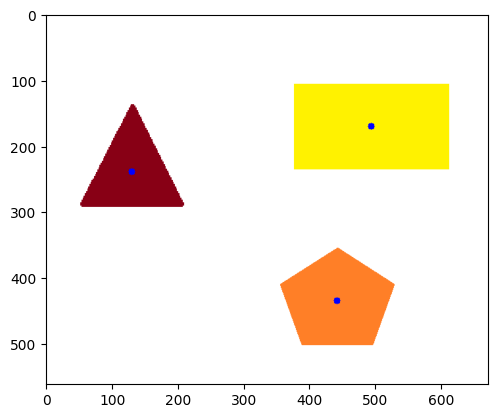

In [4]:
image = cv.imread(r"D:\Opencv\class.vision-master\images\shapes2.png")

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
_, binary_image = cv.threshold(gray, 245,255, cv.THRESH_BINARY_INV)

contours, hierarchy = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

for c in contours:
    M = cv.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv.circle(image, (cx,cy), 5, (255,0,0), -1)

plt.imshow(image[...,::-1])

Sorted contour Areas
[30315.0, 17775.0, 12794.5]


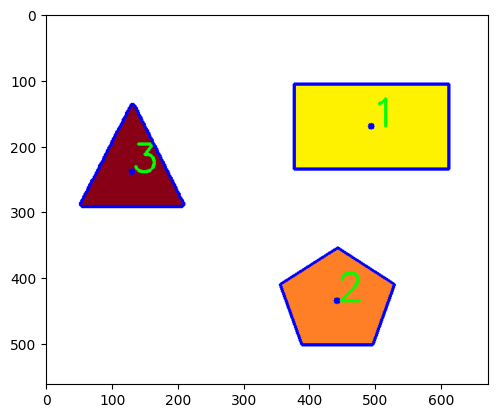

In [8]:
def get_contour_areas(contours):
    all_areas = []
    for cnt in contours:
        area = cv.contourArea(cnt)
        all_areas.append(area)
    return all_areas

sorted_contours = sorted(contours, key=cv.contourArea, reverse=True)
print("Sorted contour Areas")
print(get_contour_areas(sorted_contours))

for (i,c) in enumerate(sorted_contours):
    M = cv.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv.putText(image, str(i+1), (cx,cy), cv.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 3)
    cv.drawContours(image, [c], -1, (255,0,0), 3)
plt.imshow(image[...,::-1])

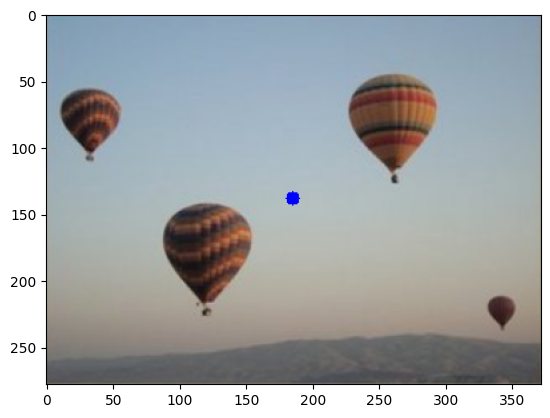

In [10]:
image = cv.imread(r"D:\Opencv\class.vision-master\images\balloon.png")

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
_, binary_image = cv.threshold(gray, 245,255, cv.THRESH_BINARY_INV)

contours, hierarchy = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

for c in contours:
    M = cv.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv.circle(image, (cx,cy), 5, (255,0,0), -1)

plt.imshow(image[...,::-1])

Sorted contour Areas
[102767.0]


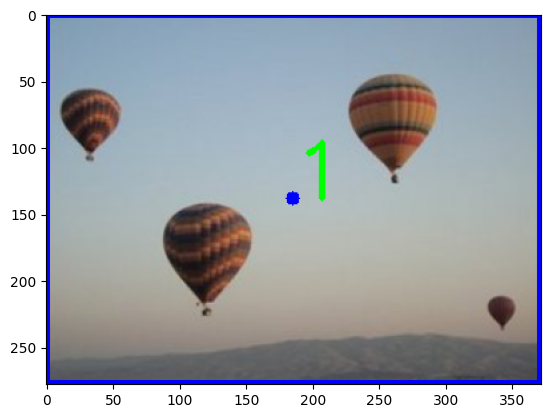

In [11]:
def get_contour_areas(contours):
    all_areas = []
    for cnt in contours:
        area = cv.contourArea(cnt)
        all_areas.append(area)
    return all_areas

sorted_contours = sorted(contours, key=cv.contourArea, reverse=True)
print("Sorted contour Areas")
print(get_contour_areas(sorted_contours))

for (i,c) in enumerate(sorted_contours):
    M = cv.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv.putText(image, str(i+1), (cx,cy), cv.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 3)
    cv.drawContours(image, [c], -1, (255,0,0), 3)
plt.imshow(image[...,::-1])

In [12]:
def x_cord_contour(contours):
    if cv.contourArea(contours) > 10:
        M = cv.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass
    
def label_contour_center(image, c):
    M = cv.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    
    cv.circle(image, (cx,cy), 10, (0,0,255), -1)
    return image

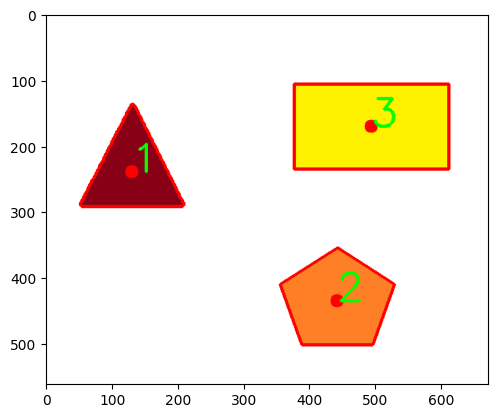

In [14]:
image = cv.imread(r"D:\Opencv\class.vision-master\images\shapes2.png")

gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
_, binary_image = cv.threshold(gray, 245,255, cv.THRESH_BINARY_INV)

contours, hierarchy = cv.findContours(binary_image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

for (i,c) in enumerate(contours):
    orig = label_contour_center(image, c)
    
contours_left_to_right = sorted(contours, key=x_cord_contour, reverse=False)

for (i,c) in enumerate(contours_left_to_right):
    cv.drawContours(image, [c], -1, (0,0,255), 3)
    M = cv.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv.putText(image, str(i+1), (cx,cy), cv.FONT_HERSHEY_SIMPLEX, 2, (0,255,0), 3)
plt.imshow(image[...,::-1])